In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/dane_symulacji.xlsx')
print(df)

    Wypełnienie  Grubość_wypełnienia Materiał   Siła  Przemieszczenie_max
0             A                 0.40      ABS  100.0                11.40
1             A                 0.40      ABS   50.0                 5.70
2             A                 0.40      ABS   25.0                 2.85
3             A                 0.40      ABS   12.5                 1.43
4             A                 0.45      ABS  100.0                11.17
..          ...                  ...      ...    ...                  ...
235           D                 0.55      PET   12.5                 1.10
236           D                 0.60      PET  100.0                 8.69
237           D                 0.60      PET   50.0                 4.35
238           D                 0.60      PET   25.0                 2.17
239           D                 0.60      PET   12.5                 1.09

[240 rows x 5 columns]


In [ ]:
scaler = StandardScaler()
df_standard = df.copy()
df_standard[['Grubość_wypełnienia','Siła']] = scaler.fit_transform(df[['Grubość_wypełnienia','Siła']])
df_standard

,Wypełnienie,Grubość_wypełnienia,Materiał,Siła,Przemieszczenie_max
0,A,-1.414214,ABS,1.585258,11.40
1,A,-1.414214,ABS,0.093250,5.70
2,A,-1.414214,ABS,-0.652753,2.85
3,A,-1.414214,ABS,-1.025755,1.43
4,A,-0.707107,ABS,1.585258,11.17
...,...,...,...,...,...
235,D,0.707107,PET,-1.025755,1.10
236,D,1.414214,PET,1.585258,8.69
237,D,1.414214,PET,0.093250,4.35
238,D,1.414214,PET,-0.652753,2.17


In [ ]:
label_encoder = LabelEncoder()
df_standard['Wypełnienie'] = label_encoder.fit_transform(df_standard['Wypełnienie'])
df_standard['Materiał'] = label_encoder.fit_transform(df_standard['Materiał'])
df_standard

,Wypełnienie,Grubość_wypełnienia,Materiał,Siła,Przemieszczenie_max
0,0,-1.414214,0,1.585258,11.40
1,0,-1.414214,0,0.093250,5.70
2,0,-1.414214,0,-0.652753,2.85
3,0,-1.414214,0,-1.025755,1.43
4,0,-0.707107,0,1.585258,11.17
...,...,...,...,...,...
235,3,0.707107,1,-1.025755,1.10
236,3,1.414214,1,1.585258,8.69
237,3,1.414214,1,0.093250,4.35
238,3,1.414214,1,-0.652753,2.17


In [ ]:
X = df_standard[['Wypełnienie', 'Grubość_wypełnienia', 'Materiał', 'Siła']]
y = df_standard['Przemieszczenie_max']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
parameters = {'splitter':['best', 'random'], 'max_depth':[i for i in range(5, 16, 2)], 'min_samples_split': [i for i in range(2, 10, 3)], 'min_samples_leaf': [i for i in range(1, 5, 1)]}

In [ ]:
model = DecisionTreeRegressor(random_state=42)

In [ ]:
clf = GridSearchCV(model, parameters)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 7, 9, 11, 13, 15],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 8],
                         'splitter': ['best', 'random']})

In [ ]:
print(f"Najlepsze parametry: {clf.best_params_}")

Najlepsze parametry: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
final_model = clf.best_estimator_
final_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

In [ ]:
y_pred = final_model.predict(X_validation)

mse = mean_squared_error(y_validation, y_pred)
print(f"Średni błąd kwadratowy: {mse}")
r2 = r2_score(y_validation, y_pred)
print(f"Współczynnik determinacji R²: {r2}")
mae = mean_absolute_error(y_validation, y_pred)
print(f"Średni błąd bezwzględny (MAE): {mae}")

Średni błąd kwadratowy: 0.012970833333333312
Współczynnik determinacji R²: 0.9987677299427192
Średni błąd bezwzględny (MAE): 0.08708333333333325


In [ ]:
y_test_pred = final_model.predict(X_test)
print(f'Przewidywane przemieszczenie: {y_test_pred[0:10]}')

Przewidywane przemieszczenie: [ 3.94  1.12  2.69 10.75  9.11  1.41  2.11  4.01  8.74  2.23]


In [ ]:
X_test

,Wypełnienie,Grubość_wypełnienia,Materiał,Siła
201,2,-1.414214,1,0.093250
227,3,-0.707107,1,-1.025755
10,0,0.000000,0,-0.652753
16,0,1.414214,0,1.585258
176,0,1.414214,1,1.585258
55,2,0.707107,0,-1.025755
114,1,0.707107,2,-0.652753
125,2,-0.707107,2,0.093250
104,1,-0.707107,2,1.585258
150,3,0.000000,2,-0.652753


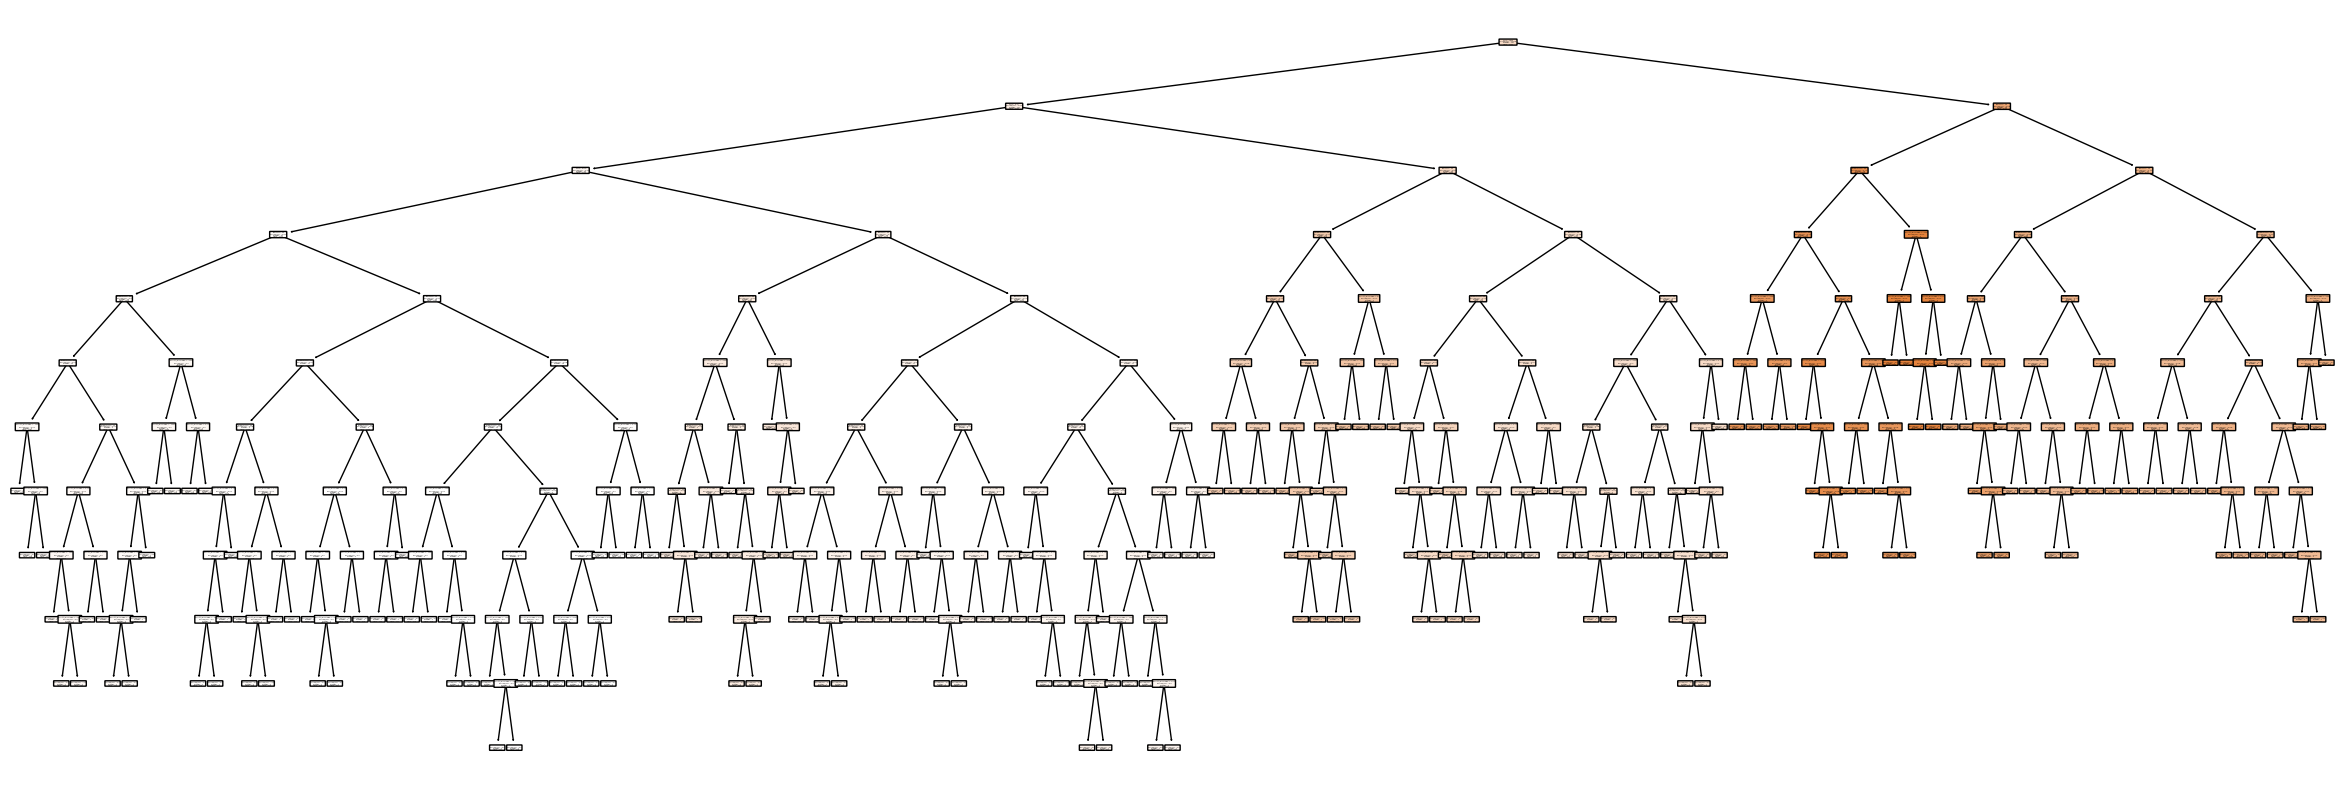

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
tree.plot_tree(final_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()